In [ ]:
#This Python code is for the submitted manuscript:
# The fundamental limits of sparse linear regression with sublinear sparsity, Arxiv: https://arxiv.org/abs/2101.11156
# This program plots MMSE and the MSE of AMP as functions of SNR

In [11]:
import math
import numpy as np
from scipy import integrate
from numpy import linalg as LA
import matplotlib.pyplot as plt


In [12]:
n=500
alpha=0.1
beta=0.9
m=math.floor(alpha*(n**beta))
k=n**beta
snrdB=np.array(range(-2,3,1))
snr=10**(0.1*snrdB)
Deltavec=alpha/snr

In [13]:
# Draw the theoretical limit (MMSE)
gap=10**(-2)
tilE=np.zeros(len(Deltavec))
count=0
while count<len(Deltavec):
 Delta=Deltavec[count]
 step=gap*Delta/n**(1-beta)
 Evec=np.arange(0,Delta/n**(1-beta),step) # Trace tilE(Delta)
 E=Evec[0]
 pphi=(alpha/2)*(np.log(1+E/Delta)-E/(E+Delta))
 Sigma=np.sqrt((E+Delta)/(alpha*(n**(beta-1)))) 
 positivepart=lambda y: ((1-k/n)*(1/(Sigma*np.sqrt(2*math.pi)))*np.exp(-y**2/(2*Sigma**2))\
                        +(k/n)*(1/(2*Sigma*np.sqrt(2*math.pi)))\
                        *(np.exp(-(y-np.sqrt(Delta))**2/(2*Sigma**2))\
                        +np.exp(-(y+np.sqrt(Delta))**2/(2*Sigma**2)))\
                        *(np.log(1/(2*Sigma*np.sqrt(2*math.pi)))-(1/(2*Sigma**2))*(y-np.sqrt(Delta))**2 \
                        +np.log(2*(1-k/n)*np.exp((Delta-2*y*np.sqrt(Delta))/(2*Sigma**2))\
                        +(k/n)*(1+np.exp(-2*y*np.sqrt(Delta)/Sigma**2)))))
 iden1,err1=integrate.quad(positivepart, 0, np.inf)
 negativepart=lambda y: ((1-k/n)*(1/(Sigma*np.sqrt(2*math.pi)))*np.exp(-y**2/(2*Sigma**2))\
                        +(k/n)*(1/(2*Sigma*np.sqrt(2*math.pi)))\
                        *(np.exp(-(y-np.sqrt(Delta))**2/(2*Sigma**2))\
                        +np.exp(-(y+np.sqrt(Delta))**2/(2*Sigma**2)))\
                        *(np.log(1/(2*Sigma*np.sqrt(2*math.pi)))-(1/(2*Sigma**2))*(y+np.sqrt(Delta))**2 \
                        +np.log(2*(1-k/n)*np.exp((Delta+2*y*np.sqrt(Delta))/(2*Sigma**2))\
                        +(k/n)*(1+np.exp(2*y*np.sqrt(Delta)/Sigma**2)))))
 iden2,err2=integrate.quad(negativepart, -np.inf, 0)
 iden=-(iden1+iden2)-(1/2)*np.log(2*math.pi*np.exp(1)*Sigma**2)
 fRSmin=pphi+n**(1-beta)*iden
 tilEtemp=E   
 for t in range(1,len(Evec)-1,1):
  E=Evec[t]
  pphi=(alpha/2)*(np.log(1+E/Delta)-E/(E+Delta))
  Sigma=np.sqrt((E+Delta)/(alpha*(n**(beta-1)))) 
  positivepart=lambda y: ((1-k/n)*(1/(Sigma*np.sqrt(2*math.pi)))*np.exp(-y**2/(2*Sigma**2))\
                        +(k/n)*(1/(2*Sigma*np.sqrt(2*math.pi)))\
                        *(np.exp(-(y-np.sqrt(Delta))**2/(2*Sigma**2))\
                        +np.exp(-(y+np.sqrt(Delta))**2/(2*Sigma**2)))\
                        *(np.log(1/(2*Sigma*np.sqrt(2*math.pi)))-(1/(2*Sigma**2))*(y-np.sqrt(Delta))**2 \
                        +np.log(2*(1-k/n)*np.exp((Delta-2*y*np.sqrt(Delta))/(2*Sigma**2))\
                        +(k/n)*(1+np.exp(-2*y*np.sqrt(Delta)/Sigma**2)))))
  iden1,err1=integrate.quad(positivepart, 0, np.inf)
  negativepart=lambda y: ((1-k/n)*(1/(Sigma*np.sqrt(2*math.pi)))*np.exp(-y**2/(2*Sigma**2))\
                        +(k/n)*(1/(2*Sigma*np.sqrt(2*math.pi)))\
                        *(np.exp(-(y-np.sqrt(Delta))**2/(2*Sigma**2))\
                        +np.exp(-(y+np.sqrt(Delta))**2/(2*Sigma**2)))\
                        *(np.log(1/(2*Sigma*np.sqrt(2*math.pi)))-(1/(2*Sigma**2))*(y+np.sqrt(Delta))**2 \
                        +np.log(2*(1-k/n)*np.exp((Delta+2*y*np.sqrt(Delta))/(2*Sigma**2))\
                        +(k/n)*(1+np.exp(2*y*np.sqrt(Delta)/Sigma**2)))))
  iden2,err2=integrate.quad(negativepart, -np.inf, 0)
  iden=-(iden1+iden2)-(1/2)*np.log(2*math.pi*np.exp(1)*Sigma**2)
  fRS=pphi+n**(1-beta)*iden
  if fRS<fRSmin:
    tilEtemp=E
    fRSmin=fRS
 tilE[count]=(n**(1-beta))*tilEtemp
 count+=1 

In [14]:
def etafunanderielemt(x,k,n,tau,Delta):
 if x>=0:
   yelemt=((1/2)*(k/n)*np.sqrt(Delta)*(1-np.exp(-2*x*np.sqrt(Delta)/tau**2)))/((1-k/n)*np.exp((Delta-2*x*np.sqrt(Delta))/(2*tau**2))
                            +(1/2)*(k/n)*(1+np.exp(-2*x*np.sqrt(Delta)/tau**2)))
   a=(Delta/(2*tau**2))*(k/n)*(1-k/n)*np.exp((Delta-2*x*np.sqrt(Delta))/(2*tau**2))\
               *(1+np.exp(-2*x*np.sqrt(Delta)/tau**2))\
               +(Delta/tau**2)*(k/n)**2*np.exp(-2*x*np.sqrt(Delta)/tau**2)
   b=(((1-k/n)*np.exp((Delta-2*x*np.sqrt(Delta))/(2*tau**2))\
           +(1/2)*(k/n)*(1+np.exp(-2*x*np.sqrt(Delta)/(2*tau**2)))))**2
 else:
   yelemt=((1/2)*(k/n)*np.sqrt(Delta)*(-1+np.exp(2*x*np.sqrt(Delta)/tau**2)))/((1-k/n)*np.exp((Delta+2*x*np.sqrt(Delta))/(2*tau**2))
                            +(1/2)*(k/n)*(1+np.exp(2*x*np.sqrt(Delta)/tau**2)))
   a=(Delta/(2*tau**2))*(k/n)*(1-k/n)*np.exp((Delta+2*x*np.sqrt(Delta))/(2*tau**2))\
               *(1+np.exp(2*x*np.sqrt(Delta)/tau**2))\
               +(Delta/tau**2)*(k/n)**2*np.exp(2*x*np.sqrt(Delta)/tau**2)
   b=(((1-k/n)*np.exp((Delta+2*x*np.sqrt(Delta))/(2*tau**2))\
           +(1/2)*(k/n)*(1+np.exp(2*x*np.sqrt(Delta)/(2*tau**2)))))**2 
 yderielemt=a/b
 return yelemt,yderielemt   

def etafunanderi(v,k,n,tau,Delta):
 yderitemp=np.zeros((len(v),1))
 y=np.zeros((len(v),1)) 
 for i in range(len(v)):
  y[i],yderitemp[i]=etafunanderielemt(v[i][0],k,n,tau,Delta)
 yderi=np.mean(yderitemp)
 return y,yderi

# Run AMP (iter=10)
MSE10=np.zeros(len(Deltavec)) # ALG1
MSE11=np.zeros(len(Deltavec)) # Classical AMP
for count in range(len(Deltavec)):
 Delta=Deltavec[count]
 maxouter=100
 MSEouter10=np.zeros(maxouter)
 MSEouter11=np.zeros(maxouter)
 out=0 
 while out<maxouter:
 # Generate S,A,y
  s=np.zeros(n)
  for i in range(n):
   s[i]= np.random.binomial(1, k/n)
   if s[i]==1:
    s[i]=(2*np.random.binomial(1, 1/2)-1)*np.sqrt(Delta)
  A=np.sqrt(1/(alpha*n**beta))*np.random.normal(0,1,size=(m,n))
  W=np.random.normal(0,1,size=(m,1))
  y=np.matmul(A,s)+ W*np.sqrt(Delta)
  # Algorithm 1
  xhat=np.zeros((n,1))
  iterAMP=10
  z=np.zeros((m,1))
  iter=0
  pderi=0
  tau=np.sqrt(Delta+Delta/alpha)
  while iter<iterAMP:
    z=y-np.matmul(A,xhat)+(1/alpha)*z*pderi
    h=np.matmul(A.transpose(),z)+xhat
    p,pderi=etafunanderi(h,k,n,tau,Delta)  #etafunanderi(x,k,n,tau,Delta)
    xhat=p
    maxiter=1000
    u=np.random.normal(size=(maxiter,1))
    ma,deria=etafunanderi(tau*u,k,n,tau,Delta)  #etafunanderi(xi,k,n,tau,Delta):
    mb,derib=etafunanderi(np.sqrt(Delta)+tau*u,k,n,tau,Delta)
    mc,deric=etafunanderi(-np.sqrt(Delta)+tau*u,k,n,tau,Delta)
    v=(1-k/n)*ma**2+(k/n)*(1/2)*((mb-np.sqrt(Delta))**2+(mc+np.sqrt(Delta))**2)
    G=np.mean(v)
    tau=np.sqrt(Delta+(n**(1-beta)/alpha)*G)
    iter+=1
  sumup=0
  for i in range(len(s)):
    sumup=sumup+(xhat[i]-s[i])**2
  MSEouter10[out]=sumup/n**beta
  # Classical AMP
  xhat=np.zeros((n,1))
  iterAMP=10
  z=np.zeros((m,1))
  iter=0
  pderi=0
  tau=np.sqrt(Delta+Delta/alpha)
  while iter<iterAMP:
    z=y-np.matmul(A,xhat)+(1/alpha)*z*pderi
    h=np.matmul(A.transpose(),z)+xhat
    p,pderi=etafunanderi(h,k,n,tau,Delta)  #etafunanderi(x,k,n,tau,Delta)
    xhat=p
    maxiter=1000
    u=np.random.normal(size=(maxiter,1))
    ma,deria=etafunanderi(tau*u,k,n,tau,Delta)  #etafunanderi(xi,k,n,tau,Delta):
    mb,derib=etafunanderi(np.sqrt(Delta)+tau*u,k,n,tau,Delta)
    mc,deric=etafunanderi(-np.sqrt(Delta)+tau*u,k,n,tau,Delta)
    v=(1-k/n)*ma**2+(k/n)*(1/2)*((mb-np.sqrt(Delta))**2+(mc+np.sqrt(Delta))**2)
    G=np.mean(v)
    tau=np.sqrt(Delta+(1/alpha)*G)
    iter+=1
  sumup=0
  for i in range(len(s)):
    sumup=sumup+(xhat[i]-s[i])**2
  MSEouter11[out]=sumup/n**beta
  out+=1 #outer loop
  MSE10[count]=np.mean(MSEouter10)
  MSE11[count]=np.mean(MSEouter11)


In [15]:
#State Evolutions
SE=np.zeros(len(Deltavec)) # State Evolution
for count in range(len(Deltavec)):
 Delta=Deltavec[count]
 tau=np.sqrt(Delta+Delta/alpha)
 iterAMP=10;
 while iter<iterAMP:
    maxiter=1000
    u=np.random.normal(size=(maxiter,1))
    ma,deria=etafunanderi(tau*u,k,n,tau,Delta)  #etafunanderi(xi,k,n,tau,Delta):
    mb,derib=etafunanderi(np.sqrt(Delta)+tau*u,k,n,tau,Delta)
    mc,deric=etafunanderi(-np.sqrt(Delta)+tau*u,k,n,tau,Delta)
    v=(1-k/n)*ma**2+(k/n)*(1/2)*((mb-np.sqrt(Delta))**2+(mc+np.sqrt(Delta))**2)
    G=np.mean(v)
    tau=np.sqrt(Delta+(n**(1-beta)/alpha)*G)
    iter+=1
 SE[count]=alpha*(tau**2-Delta)
 

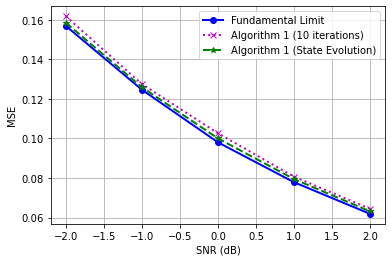

In [16]:
fig, ax = plt.subplots()
ax.plot(snrdB,tilE,'b-o',snrdB,MSE10,'m:x',snrdB,SE,'g--*',linewidth=2)
ax.set_xlabel('SNR (dB)')
ax.set_ylabel('MSE')
plt.legend(('Fundamental Limit','Algorithm 1 (10 iterations)','Algorithm 1 (State Evolution)'))
#ax.set_xlim((1, 2.5))
#ax.set_ylim((0, 1))
ax.grid(True)
plt.savefig("JML2021Funda02.pdf")